# Bike Rental Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import math

In [2]:
df = pd.read_excel(r'C:\Users\Milan\Downloads\1657875746_day.xlsx')

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.shape

(731, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [10]:
df['season']=df.season.astype('category')
df['yr']=df.yr.astype('category')
df['mnth']=df.mnth.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weathersit']=df.weathersit.astype('category')

In [11]:
df.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Monthly distribution of counts

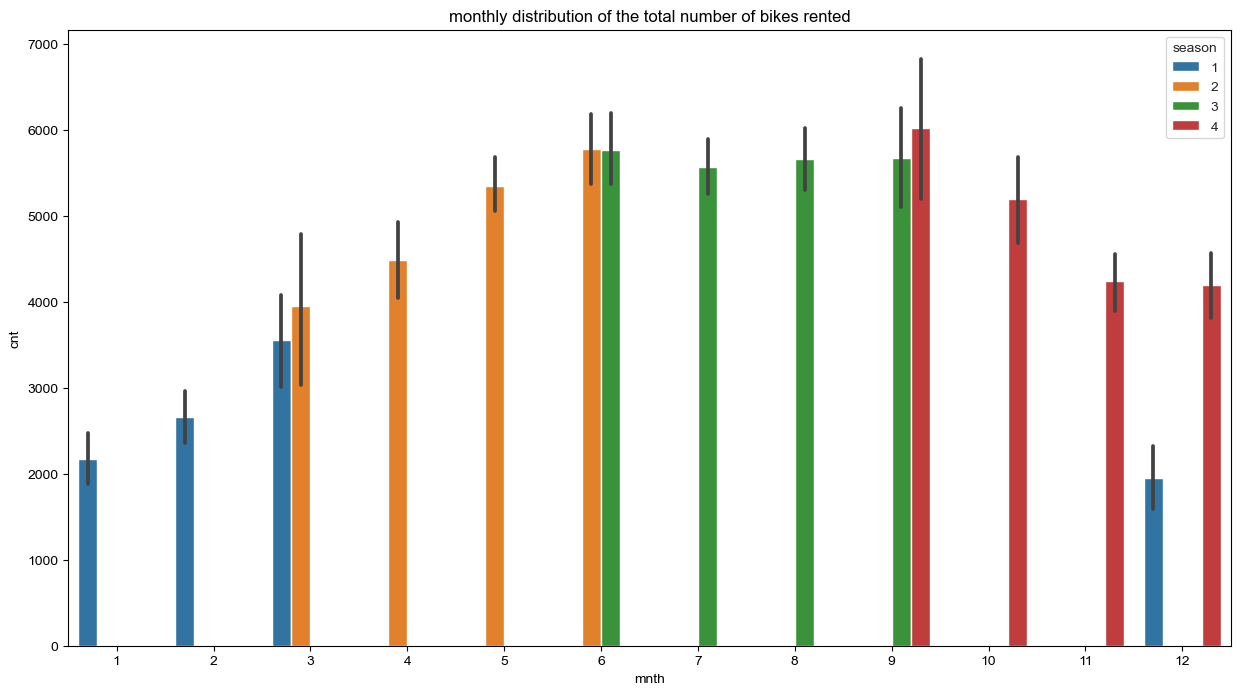

In [12]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
sns.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','season']],hue='season',ax=ax)
ax.set_title('monthly distribution of the total number of bikes rented')
plt.show()

# Yearly distribution of counts

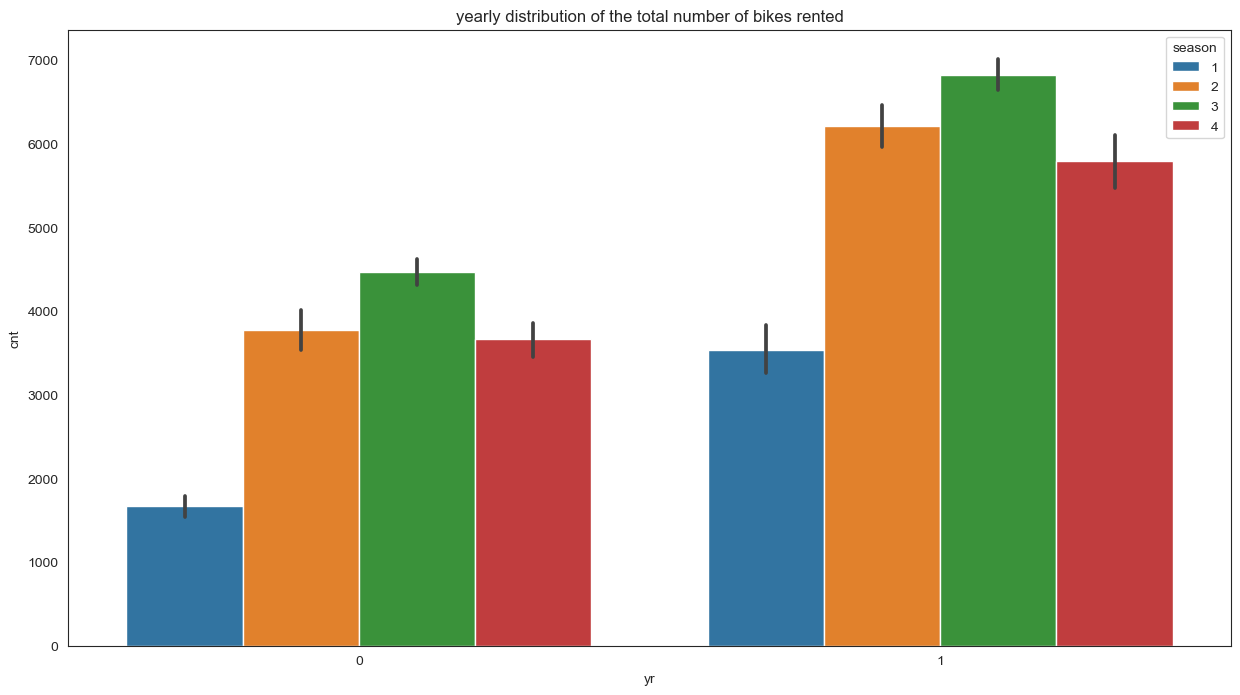

In [13]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
sns.barplot(x='yr',y='cnt',data=df[['yr','cnt','season']],hue='season',ax=ax)
ax.set_title('yearly distribution of the total number of bikes rented')
plt.show()

# TotalCount Outliers

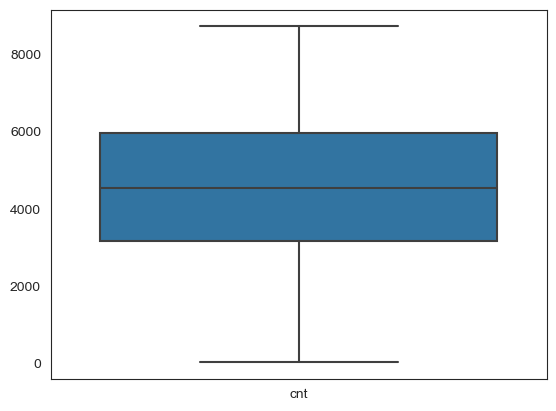

In [14]:
sns.boxplot(data=df[['cnt']])
ax.set_title('cnt outliers')
plt.show()

# Temp_windspeed_humidity outliers

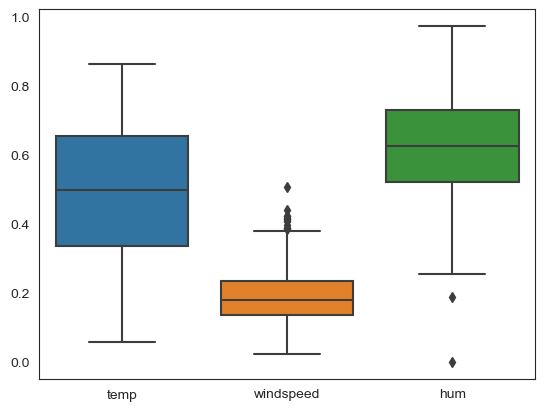

In [15]:
sns.boxplot(data=df[['temp','windspeed','hum']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

# Modelling the dataset

In [16]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-3],df.iloc[:,-1],test_size=0.3, random_state=42)

In [18]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(511, 13) (220, 13) (511,) (220,)
223    4905
684    5445
685    5698
163    5020
394    3624
Name: cnt, dtype: int64
703    6606
33     1550
300    3747
456    6041
633    7538
Name: cnt, dtype: int64
(511, 13) (220, 14) (511,) (220, 2)
223    4905
684    5445
685    5698
163    5020
394    3624
Name: cnt, dtype: int64
   index   cnt
0    703  6606
1     33  1550
2    300  3747
3    456  6041
4    633  7538


In [19]:
train_attributes=X_train[['season','mnth','yr','weekday','holiday','workingday','weathersit','hum','temp','windspeed']]

In [20]:
test_attributes=X_test[['season','mnth','yr','weekday','holiday','workingday','hum','temp','windspeed','weathersit']]

In [21]:
cat_attributes=['season','holiday','workingday','weathersit','yr']
num_attributes=['temp','windspeed','hum','mnth','weekday']

In [22]:
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 18)


,mnth,weekday,hum,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,yr_0,yr_1
223,8,5,0.415000,0.708333,0.125621,0,0,1,0,1,0,0,1,1,0,0,1,0
684,11,4,0.620417,0.321667,0.152987,0,0,0,1,1,0,0,1,0,1,0,0,1
685,11,5,0.524583,0.345000,0.171025,0,0,0,1,1,0,0,1,1,0,0,0,1
163,6,1,0.494583,0.635000,0.305350,0,1,0,0,1,0,0,1,1,0,0,1,0
394,1,1,0.400833,0.269167,0.215792,1,0,0,0,1,0,0,1,1,0,0,0,1


In [23]:
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (220, 18)


,mnth,weekday,hum,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,yr_0,yr_1
0,12,2,0.733750,0.475833,0.174129,0,0,0,1,1,0,0,1,1,0,0,0,1
1,2,4,0.437826,0.186957,0.277752,1,0,0,0,1,0,0,1,1,0,0,1,0
2,10,5,0.585833,0.330833,0.229479,0,0,0,1,1,0,0,1,0,1,0,1,0
3,4,0,0.676250,0.425833,0.172267,0,1,0,0,1,0,1,0,0,1,0,0,1
4,9,2,0.570000,0.550000,0.236321,0,0,0,1,1,0,0,1,1,0,0,0,1


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded_attributes
rf=RandomForestRegressor(n_estimators=200)

In [25]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [26]:
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.980860013313758


In [34]:
predict=cross_val_predict(rf,X_train,y_train,cv=3)
predict

array([4973.015, 4760.62 , 5272.905, 4777.09 , 3043.5  , 5747.095,
       6642.77 , 3886.495, 4385.995, 3597.125, 5930.515, 3445.57 ,
       4241.83 , 6934.995, 4871.94 , 6658.655, 4077.275, 2703.815,
       1164.29 , 1323.99 , 6212.295, 3268.01 , 4700.91 , 4514.125,
       7158.705, 6230.29 , 3059.16 , 4253.255, 1435.765, 4958.905,
       1064.09 , 1801.5  , 1487.515, 1947.645, 4713.865, 4909.55 ,
       6739.145, 3972.11 , 4322.16 , 6116.56 , 6548.44 , 4287.26 ,
       7142.65 , 6405.56 , 4412.665, 3322.67 , 1266.235, 3832.46 ,
       4703.715, 6515.085, 2863.165, 6455.885, 6352.71 , 3312.125,
       4924.74 , 3304.955, 1401.01 , 4088.395, 1033.81 , 4631.29 ,
       5557.845, 4209.015, 3650.06 , 5520.035, 4432.565, 6991.395,
       4609.515, 3182.925, 3696.86 , 4296.36 , 3632.815, 4396.83 ,
       7174.875, 3766.91 , 5032.695, 2396.545, 2524.105, 4578.155,
       2331.58 , 4194.645, 4367.2  , 4742.47 , 4188.255, 2079.7  ,
       7576.525, 4334.135, 4687.21 , 7186.825, 4592.795, 4195.

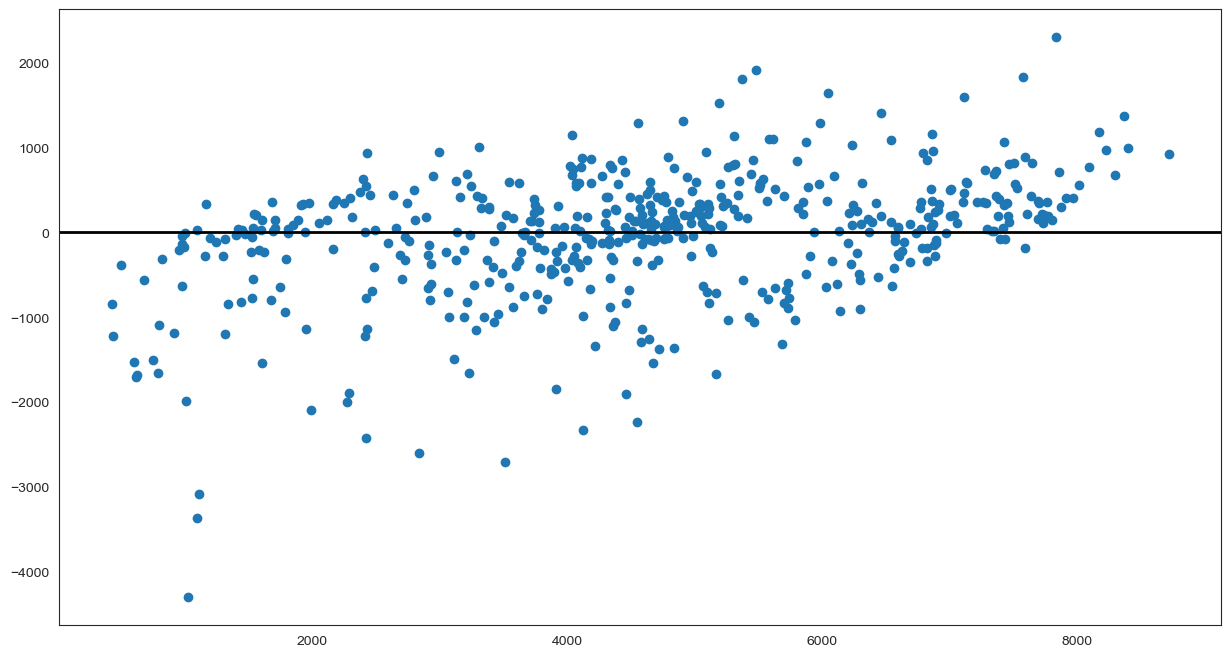

In [36]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')

In [27]:
r2_scores = cross_val_score(rf, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8465740678994603


In [37]:
X_test=test_encoded_attributes
rf_pred=rf.predict(X_test)
rf_pred

array([6618.97 , 1566.24 , 3466.58 , 5065.64 , 7489.785, 7235.255,
       1462.275, 2264.76 , 7288.29 , 6433.145, 2115.135, 2836.83 ,
       4983.935, 5054.86 , 2120.185, 2050.27 , 2237.86 , 7834.69 ,
       5017.45 , 2444.57 , 7495.77 , 6071.525, 5903.255, 1729.385,
       1736.665, 4692.385, 1965.045, 7195.625, 3152.785, 5740.79 ,
       2984.32 , 4039.03 , 6673.02 , 7323.64 , 6233.11 , 5476.35 ,
       7145.905, 6279.795, 3367.995,  899.965, 3816.265, 3227.66 ,
       7266.505, 4483.485, 6964.42 , 2340.56 , 4352.425, 5698.165,
       6598.58 , 4344.545, 4156.25 , 2983.04 , 2282.38 , 4254.945,
       4619.035, 4211.435, 3585.715, 3799.07 , 4278.22 , 6513.815,
       6204.195, 6849.585, 1945.565, 7270.565, 6428.39 , 6452.24 ,
       5976.685, 4289.05 , 1856.16 , 7466.97 , 3574.35 , 1855.25 ,
       3142.575, 4019.755, 4336.05 , 3827.855, 4685.8  , 4548.715,
       1336.47 , 4327.795, 2377.105, 1968.555, 5102.185, 4388.475,
       3678.855, 3324.785, 4088.495, 3767.21 , 3469.3  , 3316.

In [38]:
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)

mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 651.4537973705601
Mean absolute error : 431.2460227272727


In [42]:
df1=pd.DataFrame(y_test,columns=['y_test'])
df2=pd.DataFrame(rf_pred,columns=['rf_pred'])
predictions=pd.merge(df1,df2,left_index=True,right_index=True)
predictions.to_csv('1657875746_day.xlsx')
predictions

,y_test,rf_pred
0,6606,6618.970
1,1550,1566.240
2,3747,3466.580
3,6041,5065.640
4,7538,7489.785
...,...,...
215,2659,4000.440
216,7338,7293.505
217,6978,6776.105
218,4795,3532.485
